<a href="https://colab.research.google.com/github/yashikart/lstmgru/blob/main/lstmgru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


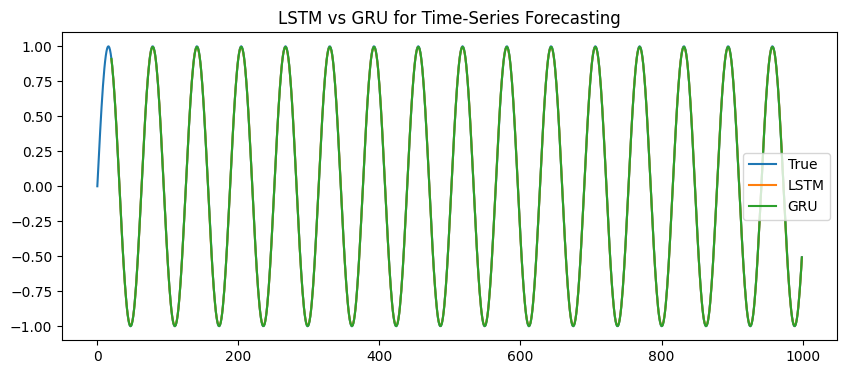

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# --- Generate simple sine wave data ---
x = np.linspace(0, 100, 1000)
y = np.sin(x)

# Prepare sequence data (past 20 steps → next value)
def create_dataset(y, step=20):
    X, Y = [], []
    for i in range(len(y)-step):
        X.append(y[i:i+step])
        Y.append(y[i+step])
    return np.array(X), np.array(Y)

X, Y = create_dataset(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

# --- LSTM Model ---
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(20,1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X, Y, epochs=10, verbose=0)

# --- GRU Model ---
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(20,1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X, Y, epochs=10, verbose=0)

# --- Compare Predictions ---
pred_lstm = lstm_model.predict(X, verbose=0)
pred_gru = gru_model.predict(X, verbose=0)

# --- Plot results ---
plt.figure(figsize=(10,4))
plt.plot(y, label='True')
plt.plot(np.arange(20, len(pred_lstm)+20), pred_lstm, label='LSTM')
plt.plot(np.arange(20, len(pred_gru)+20), pred_gru, label='GRU')
plt.legend()
plt.title("LSTM vs GRU for Time-Series Forecasting")
plt.show()


Key Points to Remember

Task: Predict next value in a sequence (time-series).

LSTM (Long Short-Term Memory):

Has 3 gates: Input, Forget, Output.

Handles long-term dependencies better.

GRU (Gated Recurrent Unit):

Has 2 gates: Update, Reset.

Simpler, trains faster, similar accuracy.

Input Shape: (samples, timesteps, features)

Loss: Mean Squared Error (mse)

Optimizer: Adam (commonly used)

Output: A single future value per sequence.

💬 Simple Interview Questions
Question	Simple Answer
Q1. What is LSTM used for?	For learning from sequential or time-series data.
Q2. How is GRU different from LSTM?	GRU is simpler (2 gates), faster, uses fewer parameters.
Q3. Which one is better?	GRU is faster, LSTM handles very long sequences better.
Q4. What are gates in LSTM?	Input, Forget, Output gates control memory flow.
Q5. What loss function is used?	MSE (Mean Squared Error) for regression tasks.


Adam = Adaptive Moment Estimation

It’s an optimization algorithm used to update neural network weights efficiently during training.

🧠 Simple Explanation

When training a model:

The optimizer adjusts weights to reduce loss.

Adam does this intelligently by combining:

Momentum (from SGD with momentum)

Adaptive learning rate (like RMSProp)

So it’s fast, stable, and works well for most tasks.